와인데이터, 로지스틱회귀--> 분류
  - 왜 분류를 그렇게 했는지 설명이 가능할까?
  - 기울기와 절편을 이용해서 수식으로 설명할수 있다.. 문장으로는 불가능
  - 수식을 찾아서 표현( core_, intercept_)

In [1]:
from sklearn.datasets import load_wine
X = load_wine().data
y = load_wine().target

In [2]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X_scaled,y,random_state=42,stratify=y)

from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr.score(X_train,y_train), lr.score(X_test,y_test)

(1.0, 0.9777777777777777)

In [3]:
lr.coef_, lr.intercept_

(array([[ 0.7264082 ,  0.16715526,  0.47795452, -0.81734692,  0.07988251,
          0.23455263,  0.69736478, -0.1144319 ,  0.1456665 ,  0.19317905,
          0.09686524,  0.65894816,  0.92384837],
        [-0.84531544, -0.51980341, -0.80278842,  0.50719481, -0.12881804,
          0.0558794 ,  0.17953643,  0.13313762,  0.37943166, -1.03100964,
          0.67418439, -0.12384842, -0.94698535],
        [ 0.11890724,  0.35264815,  0.3248339 ,  0.3101521 ,  0.04893553,
         -0.29043203, -0.87690121, -0.01870571, -0.52509816,  0.83783059,
         -0.77104962, -0.53509974,  0.02313697]]),
 array([ 0.40349474,  0.79090528, -1.19440002]))

In [4]:
X_train[:2]

array([[ 2.25977152, -0.62508622, -0.7183361 , -1.65004916, -0.192495  ,
         0.80899739,  0.95450162, -0.57898505,  0.6817379 ,  0.06138606,
         0.53767082,  0.33660575,  0.94931905],
       [-0.6060432 , -0.54429654, -1.41285087,  0.30180329, -1.03505509,
        -0.15240153, -0.10970311, -0.33725087, -0.19430416, -0.9162221 ,
         0.36217728,  1.35356458, -0.23849711]])

결정트리
  - 스무고개 하듯이 가장 중요한 Feature의 속성을 기준으로 분리해 나간다

In [7]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=42,max_depth=3)
tree.fit(X_train,y_train)

tree.score(X_train,y_train), tree.score(X_test,y_test)

(0.9924812030075187, 0.9555555555555556)

In [16]:
feature_names = ['Alcohol',
 		'Malic acid',
 		'Ash',
		'Alcalinity of ash'  ,
 		'Magnesium',
		'Total phenols',
 		'Flavanoids',
 		'Nonflavanoid phenols',
 		'Proanthocyanins',
		'Color intensity',
 		'Hue',
 		'OD280/OD315 of diluted wines',
 		'Proline']

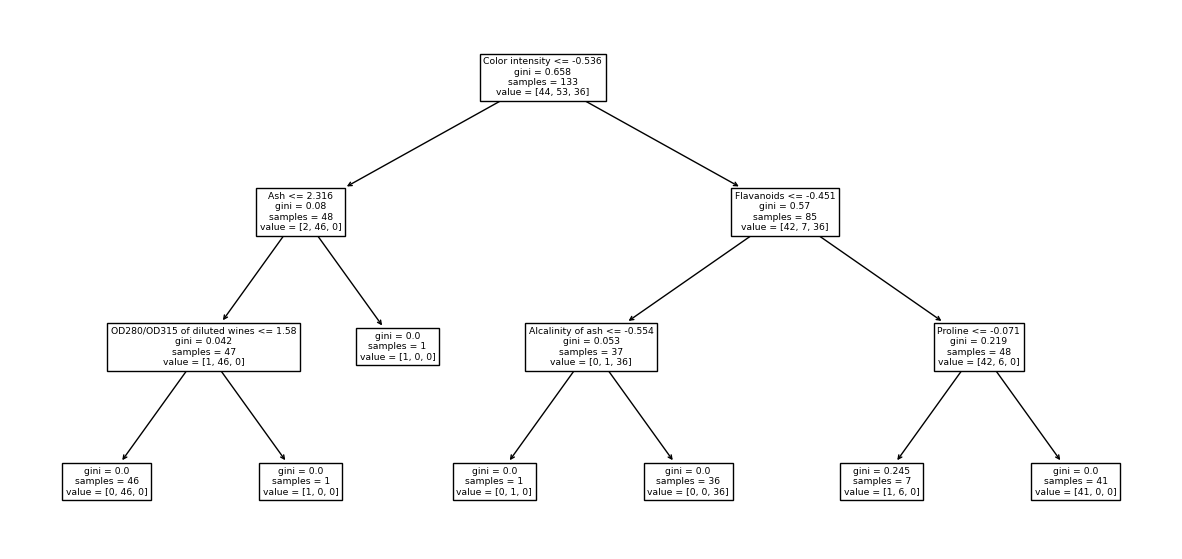

In [17]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(tree,feature_names=feature_names)
plt.show()

In [13]:
print(load_wine().DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

결정트리는 지니분순도를 이용해서 중요한 Feature 부터 분리해 나간다.
 - 이 모델을 이용하면 데이터의 중요한 Feature들을 선별할 수 가 있다
 - 현대 머신러닝은 여러개의 모델을 사용해서 최적을 모델을 선별하는데. 이때 결정트리가 최적의 Feature를 찾는데 사용

In [19]:
sum(tree.feature_importances_)

0.9999999999999999

In [20]:
tree.feature_importances_

array([0.        , 0.        , 0.02184701, 0.02266294, 0.        ,
       0.        , 0.41900338, 0.        , 0.        , 0.41136929,
       0.        , 0.02279688, 0.10232049])

In [24]:
sorted(tree.feature_importances_)

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.02184701469364435,
 0.02266294315331095,
 0.022796884897715856,
 0.1023204903677758,
 0.41136928676899837,
 0.41900338011855465]

In [22]:
tree.feature_importances_

array([0.        , 0.        , 0.02184701, 0.02266294, 0.        ,
       0.        , 0.41900338, 0.        , 0.        , 0.41136929,
       0.        , 0.02279688, 0.10232049])

In [28]:
# ['a','b','c','d','e']

# [0,10,20,50,30]  ->  이 값을 정렬하면 소용이 없다.... 왜냐? 인덱스 위치를 알아야 하기 때문에
# 50 30 20 10 0  --> 3,4,2,1,0
import numpy as np
np.argsort([0,10,20,50,30])[::-1]

array([3, 4, 2, 1, 0])

In [30]:
np.argsort(tree.feature_importances_)[::-1][:6]

array([ 6,  9, 12, 11,  3,  2])

In [38]:
np.array(feature_names)[np.argsort(tree.feature_importances_)[::-1][:6]]

array(['Flavanoids', 'Color intensity', 'Proline',
       'OD280/OD315 of diluted wines', 'Alcalinity of ash', 'Ash'],
      dtype='<U28')

In [43]:
import pandas as pd
df = pd.DataFrame(data = X,columns=feature_names)
df

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [44]:
top_important_feature = np.array(feature_names)[np.argsort(tree.feature_importances_)[::-1][:6]]

In [46]:
df2 = df[top_important_feature]
df2

,Flavanoids,Color intensity,Proline,OD280/OD315 of diluted wines,Alcalinity of ash,Ash
0,3.06,5.64,1065.0,3.92,15.6,2.43
1,2.76,4.38,1050.0,3.40,11.2,2.14
2,3.24,5.68,1185.0,3.17,18.6,2.67
3,3.49,7.80,1480.0,3.45,16.8,2.50
4,2.69,4.32,735.0,2.93,21.0,2.87
...,...,...,...,...,...,...
173,0.61,7.70,740.0,1.74,20.5,2.45
174,0.75,7.30,750.0,1.56,23.0,2.48
175,0.69,10.20,835.0,1.56,20.0,2.26
176,0.68,9.30,840.0,1.62,20.0,2.37
